# 1. train.csv 탐색

info, describe, head 등을 이용해서 데이터 탐색해주세요

In [7]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns

%matplotlib inline
rc('font', family='Malgun Gothic')
plt.style.use('ggplot')

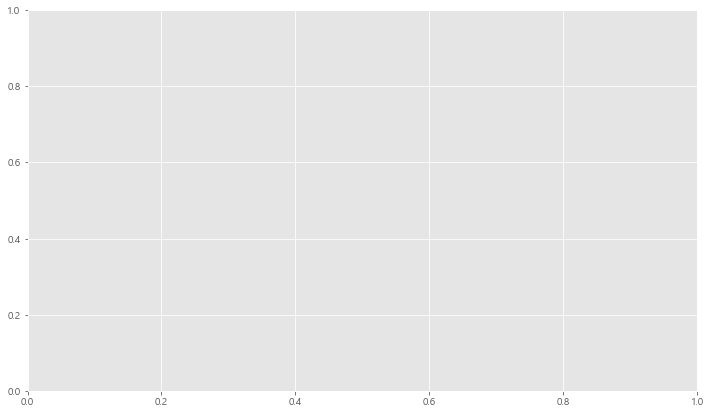

In [8]:
fig, ax = plt.subplots(figsize=(12,7))
ax

In [9]:
data_df = pd.read_csv('train.csv', encoding='utf-8')
data_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data_df.info()  # 891개 행, Age결측치, Cabin결측치, Embarked결측치

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2. 데이터 시각화

### 1) 아래의 그래프처럼 티켓 클래스별로 산 사람과 죽은 사람을 bar chart로 보여주세요

In [11]:
# Pclass&target
survived = data_df[data_df['Survived']==1]['Pclass'].value_counts()
dead = data_df[data_df['Survived']==0]['Pclass'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['survived', 'dead']
df

,1,2,3
survived,136,87,119
dead,80,97,372


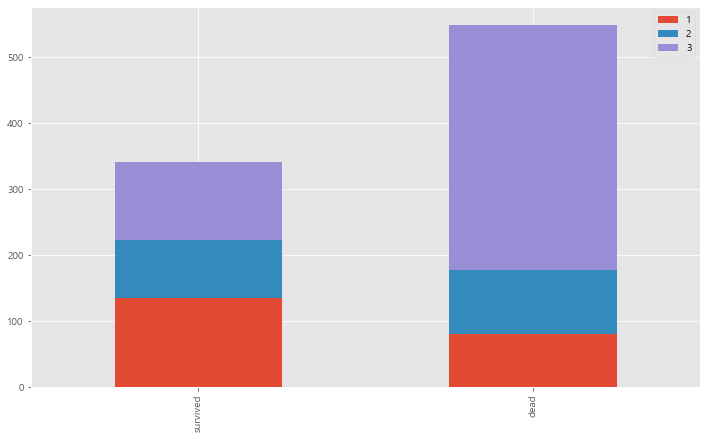

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
df.plot(kind='bar', stacked=True, ax=ax)

### 2) 아래의 그래프처럼 가족 수별로 산 사람과 죽은 사람을 bar chart로 보여주세요

In [13]:
# target & Family
data_df[['SibSp', 'Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [14]:
data_df['Familysize'] = data_df['SibSp'] + data_df['Parch'] + 1

In [15]:
set(data_df['Familysize'])

{1, 2, 3, 4, 5, 6, 7, 8, 11}

In [16]:
survived = data_df[data_df['Survived']==1]['Familysize'].value_counts()
dead = data_df[data_df['Survived']==0]['Familysize'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['survived', 'dead']
df

,1,2,3,4,5,6,7,8,11
survived,163.0,89.0,59.0,21.0,3.0,3.0,4.0,NaN,NaN
dead,374.0,72.0,43.0,8.0,12.0,19.0,8.0,6.0,7.0


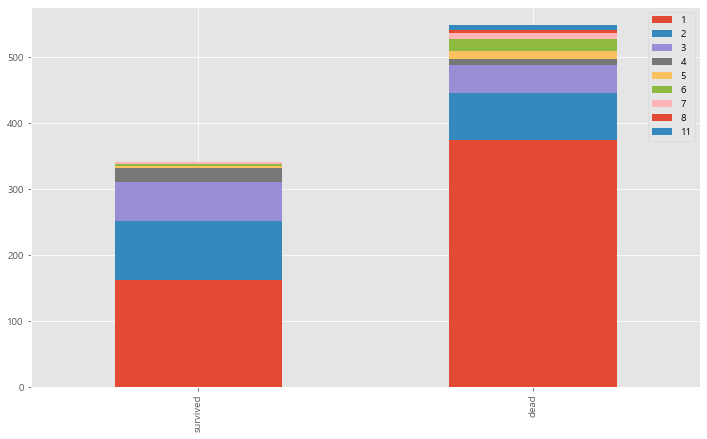

In [17]:
fig, ax = plt.subplots(figsize=(12,7))
df.plot(kind='bar', stacked=True, ax=ax)

# 3. 데이터 전처리

# 3-1. Name 처리

In [18]:
data_df[['Name']]

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [19]:
data_df['Title'] = data_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
data_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Don           1
Jonkheer      1
Mme           1
Ms            1
Countess      1
Sir           1
Capt          1
Name: Title, dtype: int64

In [20]:
data_df['Title'].count()

891

In [21]:
rare_title = []
for title in set(data_df['Title']):
    if list(data_df['Title']).count(title) < 10:
        rare_title.append(title)

data_df['Title'] = data_df['Title'].replace('Mlle', 'Miss') # Mademoiselle
data_df['Title'] = data_df['Title'].replace('Ms', 'Miss') 
data_df['Title'] = data_df['Title'].replace('Mme', 'Mrs') # Madame
data_df['Title'] = data_df['Title'].replace(rare_title, 'Rare')

data_df[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [22]:
set(data_df['Title'])

{'Master', 'Miss', 'Mr', 'Mrs', 'Rare'}

In [23]:
label = {'Master': 0 , 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Rare' : 4}
data_df['Title'] = data_df['Title'].map(label)
data_df['Title']

0      2
1      3
2      1
3      3
4      2
      ..
886    4
887    1
888    1
889    2
890    2
Name: Title, Length: 891, dtype: int64

In [24]:
data_df[['Title']]

,Title
0,2
1,3
2,1
3,3
4,2
...,...
886,4
887,1
888,1
889,2


In [25]:
del data_df['Name']

# 3-2. 성별 처리

In [26]:
data_df[['Sex']]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [27]:
label = {'male': 0, 'female':1}
data_df['Sex'] = data_df['Sex'].map(label)

In [28]:
data_df[['Sex']]

,Sex
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,1
889,0


# 3-3. Age 처리

위에서 Age에 Nan 값이 177개 있음을 확인했어요. Name 별로 그룹으로 묶어 평균값/중앙값 등으로 채워서 처리해주세요.

In [29]:
data_df[['Title','Age']]

,Title,Age
0,2,22.0
1,3,38.0
2,1,26.0
3,3,35.0
4,2,35.0
...,...,...
886,4,27.0
887,1,19.0
888,1,NaN
889,2,26.0


In [30]:
data_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
for idx in range(0, 5, +1):
    print("{}의 평균값 :{} ".format(idx, data_df[data_df['Title']==idx]['Age'].mean()))

0의 평균값 :4.574166666666667 
1의 평균값 :21.845637583892618 
2의 평균값 :32.368090452261306 
3의 평균값 :35.788990825688074 
4의 평균값 :45.54545454545455 


In [39]:
int(data_df[data_df['Title']==0]['Age'].mean())

4

In [42]:
for idx in range(0, 5, +1):
    data_df[data_df['Title']==idx]['Age'] = data_df[data_df['Title']==idx]['Age'].fillna(data_df[data_df['Title']==idx]['Age'].mean())

C:\Users\bruce0809\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
data_df[['Title','Age']].isnull().sum()

Title      0
Age      177
dtype: int64

# 3-4. Embarked 처리

embarked는 탑승한 선착장에 관한 정보입니다. Nan값이 2개라고 했어요. 이거는 가장 높은 빈도를 나타내는 S로 채워주세요

In [22]:
data_df[['Embarked']]

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [23]:
survived = data_df[data_df['Survived']==1]['Embarked'].value_counts()
dead = data_df[data_df['Survived']==0]['Embarked'].value_counts()

df = pd.DataFrame([survived, dead])
df.index = ['survived', 'dead']
df

,S,C,Q
survived,217,93,30
dead,427,75,47


In [24]:
data_df['Embarked'].isnull().sum()

2

In [35]:
data_df['Embarked'] = data_df['Embarked'].fillna('S')
label ={"S":0, "Q":1, "C":2}
data_df["Embarked"] = data_df["Embarked"].map(label)

In [37]:
data_df[['Embarked']].isnull().sum()

Embarked    0
dtype: int64

# 3-5. Fare 처리

fare의 범위가 아주 넓어요 그래서 구간을 나눠서 범주형 변수처럼 만들게요!

In [26]:
data_df[['Fare']]

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
886,13.0000
887,30.0000
888,23.4500
889,30.0000


In [47]:
# 요금 전처리
data_df["Fareband"] = pd.cut(data_df["Fare"], 5) # Bin values into discrete intervals.
data_df[['Fareband','Survived']].groupby('Fareband').mean().sort_values(by='Survived', ascending=False)

,Survived
Fareband,
"(409.863, 512.329]",1.000000
"(102.466, 204.932]",0.757576
"(204.932, 307.398]",0.647059
"(-0.512, 102.466]",0.361575
"(307.398, 409.863]",NaN


In [50]:
del data_df['Fareband']

data_df.loc[ data_df['Fare'] <= 102, 'Fare'] = 0,
data_df.loc[(data_df['Fare'] > 102) & (data_df['Fare'] <= 204), 'Fare'] = 1,
data_df.loc[(data_df['Fare'] > 204) & (data_df['Fare'] <= 307), 'Fare'] = 2,
data_df.loc[ data_df['Fare'] > 307, 'Fare'] = 4

data_df['Fare'].value_counts()

0.0    838
1.0     33
2.0     17
4.0      3
Name: Fare, dtype: int64

# 3-6. Cabin 처리

In [42]:
del data_df['Cabin']

# 3-7. FamilySize 처리

SibSp는 형제자매의 수이고, Parch는 부모자식이에요. 둘을 합치면 FamilySize가 나오기 때문에 두 변수를 하나로 합쳐주세요. 그리고 SibSp와 Parch는 제거해주세요.

In [38]:
data_df[['Familysize']]

,Familysize
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


In [40]:
del data_df['SibSp']
del data_df['Parch']

In [45]:
data_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Familysize,Title
0,0,3,0,22.0,7.2500,0,2,2
1,1,1,1,38.0,71.2833,2,2,3
2,1,3,1,26.0,7.9250,0,1,1
3,1,1,1,35.0,53.1000,0,2,3
4,0,3,0,35.0,8.0500,0,1,2


# 3-8. PassengerId, Ticket 처리 

PassengerId와 Ticket 열을 삭제해주세요.

In [29]:
del data_df['PassengerId']
del data_df['Ticket']